[[12  0  0]
 [ 0  8  0]
 [ 0  0 10]]
                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        12
Iris-versicolor       1.00      1.00      1.00         8
 Iris-virginica       1.00      1.00      1.00        10

       accuracy                           1.00        30
      macro avg       1.00      1.00      1.00        30
   weighted avg       1.00      1.00      1.00        30



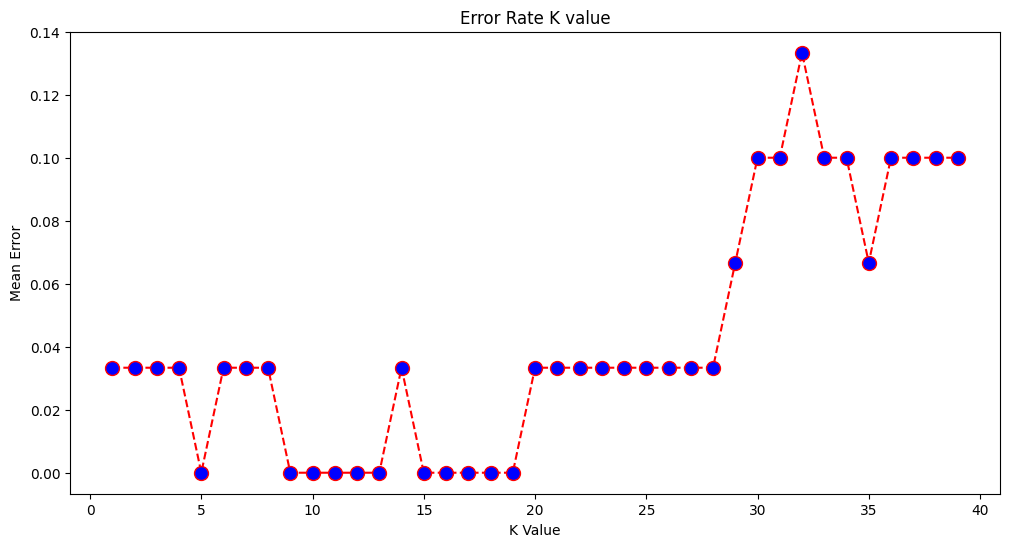

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

# url for Iris dataset
url = "https://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data"

# Assign column names to the dataset
names = ['sepal-length', 'sepal-width', 'petal-length', 'petal-width', 'Class']

# Read in the dataset
df = pd.read_csv(url, names=names)

X = df.iloc[:, :-1].values
y = df.iloc[:, 4].values

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20)

from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(X_train)

X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

from sklearn.neighbors import KNeighborsClassifier
classifier = KNeighborsClassifier(n_neighbors=5)
classifier.fit(X_train, y_train)

y_pred = classifier.predict(X_test)

from sklearn.metrics import classification_report, confusion_matrix
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

error = []
for i in range (1,40):
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_train,y_train)
    pred_i = knn.predict(X_test)
    error.append(np.mean(pred_i != y_test))

plt.figure(figsize = (12,6))
plt.plot(range(1,40),error,color='red',linestyle = 'dashed',
marker = 'o', markerfacecolor = 'blue',markersize=10)
plt.title('Error Rate K value')
plt.xlabel('K Value')
plt.ylabel('Mean Error')
plt.show()